In [3]:
using LinearAlgebra, Plots

# 1.Ejercicio 8. Clase 11
Prueba tu función `ecLineales(A,b)` con el siguiente sistema

$$
\begin{align}
    x+y+z &= 1 \\
    3x-2y+w &= -4 \\
    y - w &= 2 \\
    x-2y+4z-5w &= -6
\end{align}
$$

Cuya solución está dada por $x= -0.0555$, $y=1.8333$, $z=-0.7777$ y $w=-0.1666$

**R** Para este ejercicio se realizan los de la clase 11

(i) Supón que $a_{1,1} \neq 0$. ¿Qué operación elemental podrías aplicarle al renglón $n$ para hacer que el elemento $a_{n,1}$ se vuelva 0?

Sugerencia: La operación es convertir al renglón $n$ en una combinación lineal del renglón $1$ y el renglón $n$.

**R:** De las operaciones elementales: sumar un multiplo de un renglon a otro. En este caso seria multiplicar el renglón 1 ($R_{1}$) un número c tal que cumpla: $ (a_{1,1})(c)=-a_{n,1} $. La condición de $a_{1,1}$ es indispansable, ya que para encontrar $c$ debemos hacer: $ c=\frac{-a_{n,1}}{a_{1,1}} $. 

(ii) ¿Puedes aplicar un procedimiento similar al del inciso anterior pero ahora para hacer $a_{n-1,1}=0$? ¿y para cualquier otro $a_{k,1}=0$ con $k \neq 1$?
**R:** Sí, encontrándonos aun en la columa 1, para cada $R_{n}$ se hace el mismo procedimiento.

(iii) Vamos ahora a la segunda columna. Supón que ya realizaste todas las operaciones elementales necesarias para que $a_{k,1} =0$ para $k \neq 1$. Nuevamente suponiendo que $a_{2,2}\neq 0$, ¿cómo puedes hacer algo parecido a las operaciones elementales de los incisos anteriores para volver $a_{k,2} =0$ para $k \neq 2$

**R:** Sí, supongamos que hemos logrado hacer los $0$ para todo $a_{i+1,1}$ con $i=1,...,n$, movamonos a la culmuna 2 donde $a_{2,2}\neq 0$,; en este caso, el renglon 1 no nos será util, ya que modificará nuestro trabajo hecho anteriormente, sin en cambio en el renglón 2 tendrémos el siguiente arreglo: $R_{2} : \begin{pmatrix}
0 & a_{2,2} & \cdots & a_{2,n} \\
 \end{pmatrix} $ al tener un 0 en $a_{1,2}$ nos permite realizar el mismo procedimiento de (i) sin modificar el trabajo realizado en la culmna 1. 
La condicion $a_{i,i}\neq 0$ es indispensable para este procedimiento.

(iv) Generaliza todo lo visto anteriormente para encontrar las operaciones elementales necesarias (y el orden de ellas) para convertir a la matriz aumentada $\mathbf{C}$ en la matriz escalonada $\mathbf{C}^*$.

**R:** Tenemos la matriz aumentada
$$
\mathbf{C} = 
\begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} & b_1 \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} & b_2 \\
  \vdots  &   & \ddots &   & \vdots \\
  a_{n,1} & a_{n,2} & \cdots & a_{n,n} & b_n 
 \end{pmatrix} 
 $$
No conocemos el valor de n, pero sabemos que $C$ es una matriz aumentada, entonces tendremos $nxn+1$ y que b debe tener n elementos, usaremos esto.
Recordamos que en $a_{i,j}$ i representa los renglones y j las columnas. El orden en el que vamos a ir en las columnas será $j=1,...,n$.

Comenzemos en la columna 1: A $R_{1}$ lo multiplicaremos por $\frac{-a_{n,1}}{a_{1,1}}$ y lo sumaremos al renglon n. obteniendo así: 
$$
\mathbf{C}^* = 
\begin{pmatrix}
  a^*_{1,1} & a^*_{1,2} & \cdots & a^*_{1,n} & b^*_1 \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} & b_2 \\
  \vdots  &   & \ddots &   & \vdots \\
  0 & a^*_{n,2} & \cdots & a^*_{n,n} & b^*_n 
 \end{pmatrix} 
 $$
vamos ahora por un $0$ en $a_{n-1,1}$: A $R_{1}$ lo multiplicaremos por $\frac{-a_{n-1,1}}{a_{1,1}}$ y lo sumaremos al renglon $n-1$.

De forma general para hacer 0 en una columna: 
en $a_{i,j}$ fijamos una $j$, dejamos correr los renglones desde $i+1$ hasta $n$ y hacemos: $R_{i}=R_{i}-\frac{a_{i,j}}{a_{i,i}}(R_{j})$

Ahora, para que se haga este procedimiento en cada columna solo habrá que dejar correr $j=1,...,n$ y obtendremos
$$
\mathbf{C}^* = 
\begin{pmatrix}
  a^*_{1,1} & a^*_{1,2} & \cdots & a^*_{1,n} & b^*_1 \\
  0 & a^*_{2,2} & \cdots & a^*_{2,n} & b^*_2 \\
  \vdots  &   & \ddots &   & \vdots \\
  0 & 0 & \cdots & a^*_{n,n} & b^*_n 
 \end{pmatrix} 
 $$
 

hay que hacer toda la idea anterior en código, ¿Por qué? recordemos lo siguiente:
Cuando tenemos una matriz triangular superior, el sistema queda de la siguiente forma: 

$$
\begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  0 & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
   0 & \ldots  & a_{n-1,n-1} & a_{n-1,n} \\
 0 & \ldots  & 0 & a_{n,n} \\
 \end{pmatrix}
 \begin{pmatrix}
 x_1 \\
 x_2 \\
 \vdots \\
 x_{n-1} \\
 x_n
 \end{pmatrix} 
 =
 \begin{pmatrix}
 b_1 \\
 b_2 \\
 \vdots \\
 b_{n-1} \\
 b_n
 \end{pmatrix}
$$ 

 
entonces, es muy sencillo obtener la solucion del sistema, ya que 

$$ x_{1} = \frac{1}{a_{11}}(b_1-( a_{12} x_{2} + \ldots + a_{1 n-1} x_{n-1}+ a_{1n} x_{n}))$$
 $$x_2 = \frac{1}{a_{22}} \left(b_2 - ( a_{23} x_3 + \ldots + a_{2 n-1} x_{n-1} + a_{2n} x_n) \right) $$
 $$\vdots$$
 $$x_{n-1}= \frac{1}{a_{n-1,n-1}}(b_{n-1}-a_{n-1,n}x_{n})$$
 $$x_n = \frac{1}{a_{nn}}(b_n) $$

como podemos ver, encontrando $x_{n}$ podemos encontrar $x_{n-1}$ y asi sucesivamente.

Ahora, hay que hacer una función `solTriSuperior(A,b)` que tome como argumento un arreglo 2D `A`, que representa a una matriz **triangular superior, sin ceros en la diagonal**, de $n\times n$ , un vector solución `b` de longitud $n$ y que regresa un arreglo `xs` con la solución del sistema $\mathbf{Ax} = \mathbf{b}$ calculada usando la fórmula del inciso (iii) del ejercicio anterior.

En clase vimos que podemos hacer producto entre vectores ¿Esto donde lo hacemos? Al tomar un renglon y multiplicarlo por el xs, que contiene todos los valores de x, que es lo que encontramos entre los parentesis de las soluciones, al ser una matriz diagonal superior va sumando ceros la funcion, usaré el nombre Rs para el arreglo que representará los renglones de la matriz, xs debe tener el mismo numero de valores que de renglones de A, asi que tomamos su longitud como n. 
Notemos que el producto se va efectuando de abajo hacia arriba. 

In [29]:
function productoEscalar(Rs,xs)
    n=length(xs)
    sum=0
    for i in 1:n
        sum=sum+xs[i]*Rs[i]
    end
    return sum
end

productoEscalar (generic function with 1 method)

In [30]:
function solTriSuperior(A,b)
    n=length(b)
    xs=[b[n]/A[n,n]]
    for i in 1:n-1
        sum=productoEscalar(A[n-i,n-i+1:n],xs)
        x=(1/A[n-i,n-i])*(b[n-i]-sum)
        pushfirst!(xs,x) #este push me va a ir acomodando 
                         #las x antes del x_{n} que conocemos
                         #así que mi arreglo estára ya en orden
    end
    return xs
end

solTriSuperior (generic function with 1 method)

voy a ir haciendo las cosas por pasos
Primero hagamos en código la operación  $R_{i}=R_{i}-\frac{a_{i,j}}{a_{i,i}}(R_{j})$

In [31]:
function operRenglon(A,i)
    n=length(A[:,1])
    for j in i+1:n #ya que queremos 0 en todos menos en 
                   #el que vamos a usar
        A[j,:]=A[j,:]-(A[j,i]/A[i,i])*A[i,:]
    end
    return A
end

operRenglon (generic function with 1 method)

Ahora, vamos a correr en orden, de la columna 1 a la n (recordemos que el orden es importante para no ir borrando el trabajo hecho en alguna otra columa. 
En clase denotamos la matriz aumentada con $\mathbf{C}$

In [32]:
function elimGaussBasica(A,b)
    C=hcat(A,b)
    n=length(A[:,1])
    for i in 1:n
        operRenglon(C,i)
    end 
    return C
end 

elimGaussBasica (generic function with 1 method)

Qué tal si hay 0 en la diagonal? Solo habrá que buscar la forma de quitar ese 0, y esto se hace intercambiando renglones, este procedmiento se debe hacer antes de iniciar todo, para no arruinar el trabajo logrado.Una forma muy rápida de saber si hay ceros en la diagonal es multiplicando todos estos, si hay algun cero tendremos un cero como resultado del producto, si no es el caso podemos hacer el procedimiento normal. Hagamos una función que nos ayude con este producto:

In [33]:
function productoDiag(A) 
    n=length(A[:,1])
    prod=1
    for i in 1:n
        prod=prod*A[i,i]
    end 
    return prod
end 

productoDiag (generic function with 1 method)

Si llegamos a tener prod=0, esta función nos ayudará a cambiar renglones:

In [34]:
function cambioReng(A,i)
    rengloni=A[i,:]  
    j=1
    while A[j,i]==0
        j=j+1
    end 
    A[i,:]=A[j,:]
    A[j,:]=rengloni
    return A
end

cambioReng (generic function with 1 method)

In [35]:
function checarDiagonal(A,b)
    C=hcat(A,b)
    n=length(A[:,1])
    i=1
    while productoDiag(C)==0
            C=cambioReng(C,i)
            if i<n
                i=i+1
            else
                i=1
            end
    end
    return C
end

checarDiagonal (generic function with 1 method)

Ahora se nos pide que creemos la funcion eliminacionGaussiana(A,b) suponiendo que la matriz A no tiene ceros en la diagonal, pero si observamos nuestro sistema de ecuaciones a resolver vemos que tenemos un cero en  𝑎3,3  por eso es que hicismos los ejercicios anteriores

In [36]:
function eliminacionGaussiana(A,b)
    n=length(A[:,1])
    cd=checarDiagonal(A,b)
    for i in 1:n
        cd=operRenglon(cd,i)
        checarDiagonal(cd[1:n,1:n],cd[:,n+1])
    end
    return cd
end

eliminacionGaussiana (generic function with 1 method)

Ahora hay que implementar una función ecLineales(A,b) que use las funciones eliminaciónGaussiana(A,b) y solTriSuperior(A,b) para resolver el sistema de ecuaciones lineales.

In [37]:
function ecLineales(A,b)
    n=length(A[:,1])
    C_asterisco=eliminacionGaussiana(A,b)
    return solTriSuperior(C_asterisco[1:n,1:n],C_asterisco[:,n+1])
end

ecLineales (generic function with 1 method)

In [38]:
ecLineales([[1.0 1.0 1.0 0.0];[3.0 -2.0 0.0 1.0];[0.0 1.0 0.0 -1.0];[1.0 -2.0 4.0 -5.0]],[1.0,-4.0,2.0,-6.0])

4-element Array{Float64,1}:
 -0.05555555555555565
  1.8333333333333333
 -0.7777777777777778
 -0.16666666666666666

# 2. Ejercicio 4. Clase 12
Utiliza cualquiera de las dos funciones anteriores para resolver el siguiente sistema

$$
\begin{align}
4x - y + z &= 7 \\
4x - 8y + z &= -21 \\
-2x +y + 5z &= 15
\end{align}
$$

Con solución exacta $x=2$, $y=4$, $z=3$. ¿La sucesión generada si converge a la solución analítica? 

Grafica el error absoluto ($\Vert \mathbf{x}^{(t)} - \mathbf{x}_{\text{exacta}} \Vert$) como función del paso $t$ de la iteración y di algo sobre su tendencia.

**R** Partiendo de $\mathbf{Ax} = \mathbf{b}$ (1), se puede descomponer a $\mathbf{A}$ de la forma $\mathbf{A}=\mathbf{D}+\mathbf{R}$, donde $\mathbf{D}$  sea una matriz diagonal y $\mathbf{R}$ una matriz con ceros en la diagonal, quedando de la siguiente forma

$$
\mathbf{A} = 
\begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
 \end{pmatrix}  = \begin{pmatrix}
  a_{1,1} & 0 & \cdots & 0 \\
  0 & a_{2,2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & a_{n,n} 
 \end{pmatrix} + \begin{pmatrix}
 0 & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & 0 & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1} & a_{n,2} & \cdots & 0
 \end{pmatrix}$$
 
 Ahora podemos reescribir (1) $\mathbf{(D+R)x} = \mathbf{b} \rightarrow \mathbf{Dx}+\mathbf{Rx} = \mathbf{b} $
 Como $\mathbf{D}$ es una matriz diagonal la inversa se obtiene de una manera muy sencilla; solo se toma el inverso de cada $a_{i,i}$, con esto podemos hacer $\mathbf{x}=\mathbf{D}^{-1}(\mathbf{b}-\mathbf{Rx})$
 
 Ahora, en la clase vimos la sucesión recursiva de vectores para x, entonces  $\mathbf{x}^{k+1}=\mathbf{D}^{-1}(\mathbf{b}-\mathbf{R}\mathbf{x}^{k})=\mathbf{D}^{-1}\mathbf{b}-\mathbf{D}^{-1}\mathbf{R}\mathbf{x}^{k}$
 
En el lado izquierdo al hacer $\mathbf{D}^{-1}\mathbf{b}$ obtendremos 

$$
 \mathbf{D}^{-1}\mathbf{b}= 
\begin{pmatrix}
  a_{1,1}^{-1} & 0 & \cdots & 0 \\
  0 & a_{2,2}^{-1} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & a_{n,n}^{-1}
 \end{pmatrix}   
 \begin{pmatrix}
 b_1 \\
 b_2 \\
 \vdots \\
 b_n
 \end{pmatrix} =
 \begin{pmatrix}
 b_1  a_{1,1}^{-1} \\
 b_2  a_{2,2}^{-1} \\
 \vdots \\
 b_n  a_{n,n}^{-1}
 \end{pmatrix} = \mathbf{d}
$$

continuando con el otro producto del sumando tenemos 

$$
\mathbf{-D}^{-1}\mathbf{R}=
\begin{pmatrix}
  -a_{1,1}^{-1} & 0 & \cdots & 0 \\
  0 & -a_{2,2}^{-1} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & -a_{n,n}^{-1}
 \end{pmatrix} 
 \begin{pmatrix}
 0 & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & 0 & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1} & a_{n,2} & \cdots & 0
 \end{pmatrix} =
 \begin{pmatrix}
 0 & -a_{1,2}a_{1,1}^{-1} & \cdots & -a_{1,n}a_{1,1}^{-1} \\
  -a_{2,1}a_{2,2}^{-1} & 0 & \cdots &- a_{2,n}a_{2,2}^{-1} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  -a_{n,1}a_{n,n}^{-1} & -a_{n,2}a_{n,n}^{-1} & \cdots & 0
 \end{pmatrix}=\mathbf{C}
$$

con lo anterior ya tenemos algo de la forma $$
\mathbf{x} = \mathbf{Cx} +  \mathbf{d} 
$$

In [6]:
#crear c
function matrizc(A)
    n=length(A[:,1])
    C=A
    for i in 1:n
        C[i,:]=(-1/A[i,i])*C[i,:]
        C[i,i]=0
    end
    return C
end

matrizc (generic function with 1 method)

In [7]:
#crear d
function vectord(A,b)
    n=length(b)
    d=b
    for i in 1:n
        d[i]=d[i]*(1/A[i,i])
    end
    return d
end

vectord (generic function with 1 method)

voy a realizar la función jacobiTol(A,b,T,X_inicial), de esta funcion esperamos obtener un arreglo de arreglos.

In [8]:
function jacobi(A,b,T,x_inicial)
        res=[x_inicial]
        d=vectord(A,b)
        C=matrizc(A)
        for i in 1:T-1 
        push!(res,C*res[end]+d)
        end
    return res
end

jacobi (generic function with 1 method)

Ahora, para el ejercicio 4 tenemos que la solución exacta al sistema es  𝑥=2 ,  𝑦=4 ,  𝑧=3 . Uso la función jacobi para ver si despues de una T=15 se aprecia si la sucesión resultante converge

In [9]:
jacobi([[4.0 -1.0 1.0];[4.0 -8.0 1.0];[-2.0 1.0 5.0]],[7.0,-21.0,15.0],15,[1.0,1.0,1.0])

15-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0]
 [1.75, 3.25, 3.2]
 [1.7625, 3.9, 3.05]
 [1.9625, 3.8875, 2.925]
 [1.990625, 3.971875, 3.0075]
 [1.99109375, 3.99625, 3.001875]
 [1.99859375, 3.9957812500000003, 2.9971875]
 [1.9996484375, 3.9989453125, 3.00028125]
 [1.999666015625, 3.9998593749999998, 3.0000703125]
 [1.999947265625, 3.9998417968749997, 2.99989453125]
 [1.99998681640625, 3.99996044921875, 3.000010546875]
 [1.9999874755859375, 3.9999947265625, 3.00000263671875]
 [1.9999980224609375, 3.9999940673828123, 2.999996044921875]
 [1.9999995056152344, 3.999998516845703, 3.0000003955078123]
 [1.9999995303344726, 3.999999802246094, 3.0000000988769533]

podemos ver que la sucesion resultante converge.

In [10]:
function errorabs(x_inicial,n)
    error=[]
    for T in 1:n
        x_aproximada=jacobi([[4.0 -1.0 1.0];[4.0 -8.0 1.0];[-2.0 1.0 5.0]],[7.0,-21.0,15.0],T,x_inicial)[end]
        x_solucion=[2,4,3]

        push!(error,norm(x_aproximada-x_solucion))
    end
    return error
end

errorabs (generic function with 1 method)

In [11]:
errorabs([3.0,5.0,4.0],10)

10-element Array{Any,1}:
 1.7320508075688772
 0.6562202374203344
 0.16594897559189709
 0.0649519052838328
 0.024608258903262625
 0.006223086584696228
 0.0024356964481440824
 0.00092280970887201
 0.00023336574692586353
 9.13386168055377e-5

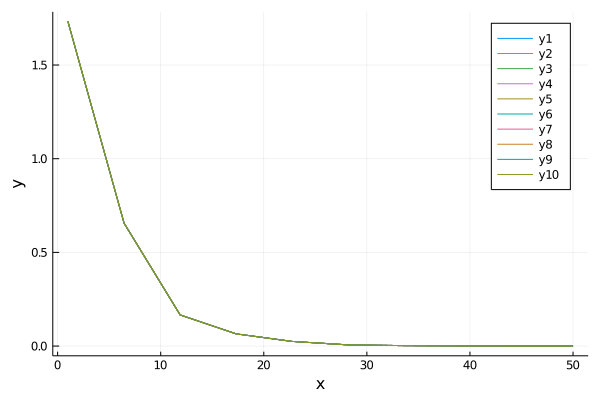

In [12]:
xs=range(1,stop=50,length=10)
ys=[errorabs([3.0,5.0,4.0],10) for T in xs]
plot(xs,ys, xlabel="x", ylabel="y")

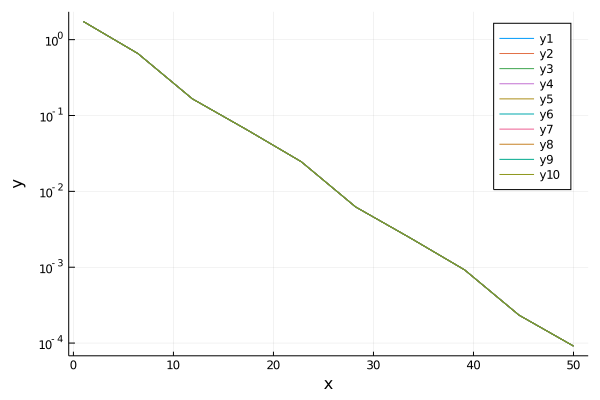

In [13]:
xs=range(1,stop=50,length=10)
ys=[errorabs([3.0,5.0,4.0],10) for T in xs]
plot(xs,ys, xlabel="x", ylabel="y",yscale=:log10)

Podemos ver que el error tiene una tendencia exponencial negativa respecto al número de iteraciones.

# 3. Ejercicio 9. Clase 13
Considera el sistema de dos carros de masas $m_1$ y $m_2$, acoplados entre si y a dos paredes por tres resortes Hookeanos (que siguen la ley de Hooke) con constantes $k_1$, $k_2$ y $k_3$. El siguiente diagrama representa al sistema:

![](https://lh3.googleusercontent.com/ccW0mrbq_sFv5BDIb5_JaH1txCvM_PhkpdEAYXsbV5_G593r3U8wN7A9B-OWgMlyYL-FzaGlow2cVSMd1fIoUsx795ybNZ_pSHpuDCemVtEGq0KvNdVGZDfDVIeKRGwbKiSN_xB1ew=w1200)


Utilizando las funciones `eigvals` y `eigvecs`, escribe una función `carrosAcoplados2(k1,k2,k3,m)` que tome como argumento números flotantes correspondientes a las constantes de resorte $k_1$, $k_2$, $k_3$ y la masa $m$ y te regrese las dos frecuencias $\omega_1, \omega_2$ y sus vectores de amplitudes correspondientes $\mathbf{A}_1, \mathbf{A}_2$.

Revisa que para el caso $k_1=k_2=k_3=k$, se cumpla

$$
\omega_1 = \sqrt{\frac{k}{m}} \quad , \quad \mathbf{A}_1 = \frac{1}{\sqrt{2}} (1,1)
$$

$$
\omega_2 = \sqrt{\frac{3k}{m}} \quad , \quad \mathbf{A}_2 = \frac{1}{\sqrt{2}} (1,-1)
$$

**Sugerencia**: para comprobar que se cumplen esas relaciones, deberán darle valores arbitrarios a $k$ y $m$

In [4]:
function carrosAcoplados(k1,k2,k3,m)
    k=[k1+k2 -k2 ; -k2 k2+k3]
    valpropios=eigvals(k)
    vecpropios=eigvecs(k)
    w1=(valpropios[1]/m)^(1/2)
    w2=(valpropios[2]/m)^(1/2)
    println(vecpropios*(-1))
    return w1,w2
end

carrosAcoplados (generic function with 1 method)

In [5]:
carrosAcoplados(2.0,2.0,2.0,5)

[0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475]


(0.6324555320336759, 1.0954451150103321)

# 4.
Encuentra los valores y vectores propios y diagonaliza las siguientes matrices

$$
\mathbf{A}_1 = \begin{pmatrix}
8 & 11 & 4 & 3 \\
11 & 12 & 4 & 7 \\
4 & 4 & 7 & 12 \\
3 & 7 & 12 & 17 \\
\end{pmatrix}
$$

$$
\mathbf{A}_2 = \begin{pmatrix}
2 & -1 & -1 & 0 \\
-1 & 3 & -1 & -1 \\
-1 & -1 & 3 & -1 \\
0 & -1 & -1 & 2 \\
\end{pmatrix}
$$

In [49]:
function BaseCanonica(i,n) 
    arr=[]
    for j in 1:n
        if j==i
            push!(arr,1)
        else
            push!(arr,0)
        end
    end
    return arr
end 

BaseCanonica (generic function with 1 method)

In [51]:
function Inversa(A)
    n=length(A[:,1])
    B=ecLineales(A,BaseCanonica(1,n))
    for i in 2:n
        B=[B ecLineales(A,BaseCanonica(i,n))]
    end
    return B
end

Inversa (generic function with 1 method)

In [52]:
function Diagonalizar(A) 
    P=eigvecs(A)  
    D=(Inversa(P)*A)*P
    display(P) 
    display(D)
end

Diagonalizar (generic function with 1 method)

In [53]:
#A1
Diagonalizar([[8 11 4 3];[11 12 4 7];[4 4 7 12];[3 7 12 17]]) #La primera es P, la segunda es D

4×4 Array{Float64,2}:
  0.565466   0.486182  -0.549555  -0.37665
 -0.468105  -0.470423  -0.551281  -0.505638
 -0.542105   0.644365   0.31321   -0.439107
  0.40896   -0.356544   0.544038  -0.64004

4×4 Array{Float64,2}:
 -2.77111       6.66134e-16   3.21965e-15   5.36238e-14
 -2.13718e-15   0.457924     -9.42302e-15  -6.2797e-14
  8.88178e-15  -7.54952e-15  13.7849        2.93099e-14
  1.77636e-15  -6.21725e-15   2.66454e-14  32.5282

In [54]:
display(eigvals([[8 11 4 3];[11 12 4 7];[4 4 7 12];[3 7 12 17]]))

4-element Array{Float64,1}:
 -2.7711067095643167
  0.4579242114812731
 13.784936206564407
 32.52824629151864

In [55]:
#A2
Diagonalizar([[2 -1 -1 0];[-1 3 -1 -1];[-1 -1 3 -1];[0 -1 -1 2]])

4×4 Array{Float64,2}:
 -0.5   0.707107      0.5   2.22045e-16
 -0.5  -9.42055e-16  -0.5   0.707107
 -0.5  -7.85046e-16  -0.5  -0.707107
 -0.5  -0.707107      0.5   0.0

4×4 Array{Float64,2}:
  5.55112e-17  -3.29719e-15   7.21645e-16   7.85046e-17
 -2.44249e-15   2.0           0.0          -3.14018e-16
  7.77156e-16   2.22045e-16   4.0          -8.88178e-16
 -1.34016e-16  -4.76607e-16  -8.80288e-17   4.0

In [56]:
display(eigvals([[2 -1 -1 0];[-1 3 -1 -1];[-1 -1 3 -1];[0 -1 -1 2]]))

4-element Array{Float64,1}:
 1.9081958235744878e-17
 2.0
 3.999999999999999
 4.0

haciendolo de forma chafa

In [57]:
function diagonaliza(A)
    P=eigvecs(A)
    D=(P^(-1))*A*P
    display(P)
    display(D)
end

diagonaliza (generic function with 1 method)

In [58]:
#A1
diagonaliza([8 11 4 3;11 12 4 7;4 4 7 12;3 7 12 17])

4×4 Array{Float64,2}:
  0.565466   0.486182  -0.549555  -0.37665
 -0.468105  -0.470423  -0.551281  -0.505638
 -0.542105   0.644365   0.31321   -0.439107
  0.40896   -0.356544   0.544038  -0.64004

4×4 Array{Float64,2}:
 -2.77111       1.55431e-15   1.07692e-14   8.43769e-15
  8.88178e-16   0.457924     -9.42302e-15  -9.61731e-15
  4.88498e-15  -6.21725e-15  13.7849        1.95399e-14
  5.32907e-15  -9.76996e-15   1.24345e-14  32.5282

In [59]:
#A2
diagonaliza([2 -1 -1 0;-1 3 -1 -1;-1 -1 3 -1;0 -1 -1 2])

4×4 Array{Float64,2}:
 -0.5   0.707107      0.5   2.22045e-16
 -0.5  -9.42055e-16  -0.5   0.707107
 -0.5  -7.85046e-16  -0.5  -0.707107
 -0.5  -0.707107      0.5   0.0

4×4 Array{Float64,2}:
  3.9443e-30   -2.90467e-15   1.66533e-15   2.35514e-16
 -2.44249e-15   2.0          -3.33067e-16  -3.14018e-16
  7.77156e-16   2.22045e-16   4.0           0.0
  0.0          -2.08575e-16  -2.22045e-16   4.0

en ambos casos los resultados obtenidos coinciden